# Project: Integrated Project Module 1

Goal of the Project: Forecasting sales for 2017 sales based on previous data.

## 1.Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np 
import os
import pylab as pl
import matplotlib.pyplot as plot

try:
    df = pd.read_csv('C:/Users/Asus/Downloads/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000   

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Opened the given datafile and looked for general inforamtion of the table.

Problem with data:
1. Lots of missing values
2. Unnecessary data
3. datatypes are not reformed

# 2.Prepare the data

## 2.1 Replace the column names (make them lowercase). 

In [2]:
print(df.columns)
df.columns= df.columns.str.lower()
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Working on Missing Values. 

In [3]:
from io import BytesIO
import requests
spreadsheet_id = "1zLDcpYndMunIBPl9NV_c_KGW7irAvuBSER41GkRp9uQ"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df2 = pd.read_csv(BytesIO(r.content),index_col=None)
df2


,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,17,white-knight-chronicles-ii,White Knight Chronicles II,NaN,NaN,NaN,8/2/2019 16:21,NaN,0,0,...,D3 Publisher of America,NaN,NaN,Teen,0,1,1,0,0,1
1,18,motionsports-adrenaline,MotionSports: Adrenaline,NaN,25102011.0,NaN,8/2/2019 16:25,NaN,0,0,...,Ubisoft,Sports,Ubisoft Entertainment,Everyone 10+,0,1,1,0,0,0
2,18,motionsports-adrenaline,MotionSports: Adrenaline,NaN,25102011.0,NaN,8/2/2019 16:25,NaN,0,0,...,Ubisoft,Sports,Ubisoft Entertainment,Everyone 10+,0,1,1,0,0,0
3,49,persona-5,Persona 5,93.0,15092016.0,NaN,11/16/2020 20:26,http://persona5.jp/,438,5,...,Atlus,Action||Adventure||RPG,Deep Silver||Atlus||Buka Entertainment,Mature,180,1556,635,353,130,228
4,49,persona-5,Persona 5,93.0,15092016.0,NaN,11/16/2020 20:26,http://persona5.jp/,438,5,...,Atlus,Action||Adventure||RPG,Deep Silver||Atlus||Buka Entertainment,Mature,180,1556,635,353,130,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,516112,captain-tsubasa-new-kick-off,Captain Tsubasa: New Kick Off,NaN,20052010.0,NaN,11/7/2020 21:04,NaN,0,0,...,Konami Digital Entertainment,Sports,Konami,NaN,0,0,0,0,1,0
9816,517328,hercules-the-legendary-journeys,Hercules: The Legendary Journeys,55.0,17112000.0,NaN,11/12/2020 15:04,NaN,0,0,...,Player 1,Action||Adventure,Titus Software,NaN,0,0,1,0,0,0
9817,517619,exhibition,Exhibition,NaN,12112020.0,NaN,11/13/2020 3:42,NaN,0,0,...,OAI,NaN,NaN,NaN,0,0,0,0,0,0
9818,519041,persona-2,Persona,NaN,15112020.0,NaN,11/16/2020 4:07,NaN,0,0,...,Walrusware,NaN,NaN,NaN,0,0,0,0,0,0


We are using another dataset from kaggle to fill some missing values in project. 

In [4]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2.isnull().sum()


id                      0
slug                    0
name                    0
metacritic              0
released                0
tba                     0
updated                 0
website                 0
rating                  0
rating_top              0
playtime                0
achievements_count      0
ratings_count           0
suggestions_count       0
game_series_count       0
reviews_count           0
platforms               0
developers              0
genres                  0
publishers              0
esrb_rating             0
added_status_yet        0
added_status_owned      0
added_status_beaten     0
added_status_toplay     0
added_status_dropped    0
added_status_playing    0
dtype: int64

We processed the data only which we needed from our second dataframe so, here we get rid of unwanted data.

In [5]:
df["name"].fillna("No Name", inplace = True) 
df["genre"].fillna("No genre", inplace = True) 

we have only two missing values in name and genre column which we gonna fill with No name and No genre for now we are gonna deal with it later

In [6]:
df2['released'] = pd.to_datetime(df2['released'],format='%Y-%m-%d')
df2['released'] = pd.DatetimeIndex(df2['released']).year

In [7]:
release_dict = pd.Series(df2["released"].values,index=df2["name"]).to_dict()
df['year_of_release'] = df['year_of_release'].fillna(df['name'].map(release_dict))
df['year_of_release'].isnull().sum()

269

we tried to fill missing values for year of release from our second dataframe but we got still some missing values as ma be some names did not match similarly with our original dataset.

In [8]:
df['year_of_release_noempty']= df.groupby('genre')['year_of_release'].transform(lambda y : y.fillna(y.mode()[0]))

df['year_of_release_noempty'].isnull().sum()

0

We are gonna fill those missing years with mode as we are gonna use most common year in those perticular genre to fill missing values. we have only 269 missing values which are less than 1% of what we have so, I don't think it is going to affect our data and further callculation.

Mode is the most frequently occuring value in a dataset or distribution. A dataset can have more than one mode. which here help us to get most frequent year to fill up for that perticular genre.

In [9]:
df['critic_score_noempty']= df.groupby('genre')['critic_score'].transform(lambda y : y.fillna(y.mean()))
df["critic_score_noempty"].fillna("0", inplace = True) 
df['critic_score_noempty'].isnull().sum()


0

Critic Score missing: It may be because critics don't want to rate the game as it may be released for short time or it may be not that popular so we are filling it with mean of grouping it with genre so, it should not affect data. and we got two missing values which we are gonna fill with 0 as those values for No name and No genre

In [10]:
df.loc[df['user_score'] == 'tbd','user_score']= 'NaN'
df['user_score'] = df['user_score'].astype(float)#weconverted datatype to float

tbd is to be determined which we will treat as missing value.

In [11]:
df['user_score_noempty']= df.groupby('genre')['user_score'].transform(lambda y : y.fillna(y.mean()))
df['user_score_noempty'].isnull().sum()

2

In [12]:
df["user_score_noempty"].fillna("0", inplace = True) 
df['user_score_noempty'].isnull().sum()

0

We followed same process as above to fill missing values in User Score. User Score has missing values because sometimes user plays a game and user does'nt rate it because he is not fully satisfied and neither fully dissappointed.

## 2.3 Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column. 

In [13]:

df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0,76,8,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,68.0584,7.3014,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,82,8.3,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0,80,8,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,72.6526,7.61952,31.38


We calculated total sales of each game by combining sales in each region

In [14]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'year_of_release_noempty', 'critic_score_noempty', 'user_score_noempty',
       'total_sales'],
      dtype='object')

In [15]:
new_df = df[['name', 'platform', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales','year_of_release_noempty', 'critic_score_noempty',
       'user_score_noempty', 'rating','total_sales']].copy()

new_df = new_df.query('genre != "No genre" and name != "No Name"')

In [16]:
rating_grouped = new_df.groupby('genre')['rating'].agg(pd.Series.mode).reset_index()
rating_dict=dict(zip(rating_grouped.genre,rating_grouped.rating))
rating_dict

{'Action': 'T',
 'Adventure': 'E',
 'Fighting': 'T',
 'Misc': 'E',
 'Platform': 'E',
 'Puzzle': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Shooter': 'M',
 'Simulation': 'E',
 'Sports': 'E',
 'Strategy': 'T'}

In [17]:
new_df['rating_noempty'] = new_df['rating'].fillna(new_df['genre'].map(rating_dict))


Here we have taken all processed data without any missing values.

In [18]:
new_df.isnull().sum()

name                          0
platform                      0
genre                         0
na_sales                      0
eu_sales                      0
jp_sales                      0
other_sales                   0
year_of_release_noempty       0
critic_score_noempty          0
user_score_noempty            0
rating                     6764
total_sales                   0
rating_noempty                0
dtype: int64

In [19]:
del new_df['rating']

In [20]:
new_df.head()
new_df.isnull().sum()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name                       16713 non-null object
platform                   16713 non-null object
genre                      16713 non-null object
na_sales                   16713 non-null float64
eu_sales                   16713 non-null float64
jp_sales                   16713 non-null float64
other_sales                16713 non-null float64
year_of_release_noempty    16713 non-null float64
critic_score_noempty       16713 non-null object
user_score_noempty         16713 non-null object
total_sales                16713 non-null float64
rating_noempty             16713 non-null object
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


We have created new dataset which does not have any missing values which will help us in further calculations

# 3. Analyze the data

## 3.1 Look at how many games were released in different years. Is the data for every period significant? 

In [21]:
games_per_year = new_df.groupby('year_of_release_noempty').agg({'name': ['count']})
games_per_year.head()

,name
,count
year_of_release_noempty,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14


Text(0, 0.5, 'number of games')

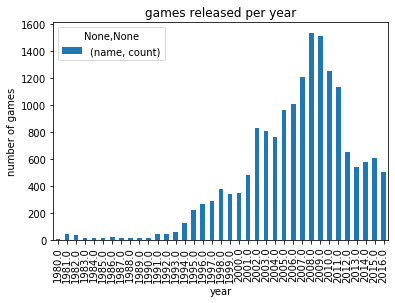

In [22]:
games_per_year.plot(sharex=True, sharey=True,kind='bar',legend = True)
pl.title('games released per year')
pl.xlabel('year')
pl.ylabel('number of games')

Here we have analysed the data about the number of games released per year and here we can see from year 2000 and further we have more volume of games released per year.

Number of games released over the period of time but the video games started to become popular from yearly 2000 when high quality gaming become passion for some individuals and then compitition increased in the market along with high quality equipments which comes with platforms as it is directly related to platforms number of platforms released more number of games.


## 3.2 Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? 

In [23]:
platform_pivot = (new_df.pivot_table(index = ['platform'], values = 'total_sales',aggfunc = 'sum')).reset_index()
platform_pivot_sorted = platform_pivot.sort_values('total_sales',ascending = False)
platform_pivot_sorted.head(5)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


Text(0, 0.5, 'number of sales')

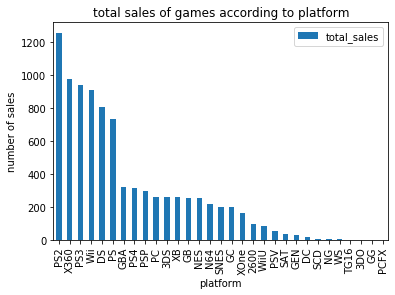

In [24]:
platform_pivot_sorted.plot('platform',sharex=True, sharey=True,kind='bar',legend = True)
pl.title('total sales of games according to platform')
pl.xlabel('platform')
pl.ylabel('number of sales')

Here we found out popular platform which did great in in total sales.
when we consider complete data PS2 and X360 are leading platforms.


## 3.3 Determine what period you should take data for. To do so, look at your answers to the previous questions. Disregard the data for previous years. 

In [25]:
year_subset = new_df.query('2014 <= year_of_release_noempty')
year_subset.sort_values('total_sales',ascending = False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales,rating_noempty
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,2015.0,70.1811,7.04188,14.63,M
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,2014.0,97,8.3,12.62,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35,3.49,3.10,0.74,2014.0,72.6526,7.61952,11.68,T
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,2015.0,82,4.3,8.58,E
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,2015.0,70.1811,7.04188,7.98,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,Action,0.01,0.00,0.00,0.00,2016.0,75,8.1,0.01,E10+
16267,The Book of Unwritten Tales 2,WiiU,Adventure,0.00,0.01,0.00,0.00,2016.0,65.3313,7.133,0.01,T
16270,Hyakka Yakou,PSV,Action,0.00,0.00,0.01,0.00,2015.0,66.6291,7.05404,0.01,T
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,Adventure,0.00,0.00,0.01,0.00,2016.0,65.3313,7.133,0.01,E


Here we created new subset with 5 top selling platforms. we have set time period of games released after year 2014 as we don't need previous years because it does not have much volume of games which are still available in market.
data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

In [26]:
platform_sales_pivot = (year_subset.pivot_table(index = ['platform'], values = 'total_sales',aggfunc = 'sum')).reset_index()
platform_sales_pivot_sorted = platform_sales_pivot.sort_values('total_sales',ascending = False)
platform_sales_pivot_sorted.head(5)

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


In [27]:
platform_subset = year_subset.query('platform in ("PS4","XOne","3DS","PS3","X360")')
platform_subset.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales,rating_noempty
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,2015.0,70.1811,7.04188,14.63,M
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,2014.0,97,8.3,12.62,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35,3.49,3.10,0.74,2014.0,72.6526,7.61952,11.68,T
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,2015.0,82,4.3,8.58,E
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,2015.0,70.1811,7.04188,7.98,M


Our top 5 platforms are: "PS4","XOne","3DS","PS3","X360"

In [28]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [29]:
platform_subset["user_score_noempty"] = pd.to_numeric(platform_subset['user_score_noempty'], errors='coerce')
platform_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 31 to 16710
Data columns (total 12 columns):
name                       1146 non-null object
platform                   1146 non-null object
genre                      1146 non-null object
na_sales                   1146 non-null float64
eu_sales                   1146 non-null float64
jp_sales                   1146 non-null float64
other_sales                1146 non-null float64
year_of_release_noempty    1146 non-null float64
critic_score_noempty       1146 non-null object
user_score_noempty         1146 non-null float64
total_sales                1146 non-null float64
rating_noempty             1146 non-null object
dtypes: float64(7), object(5)
memory usage: 116.4+ KB


## 3.4 Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. 

Text(0, 0.5, 'number of sales')

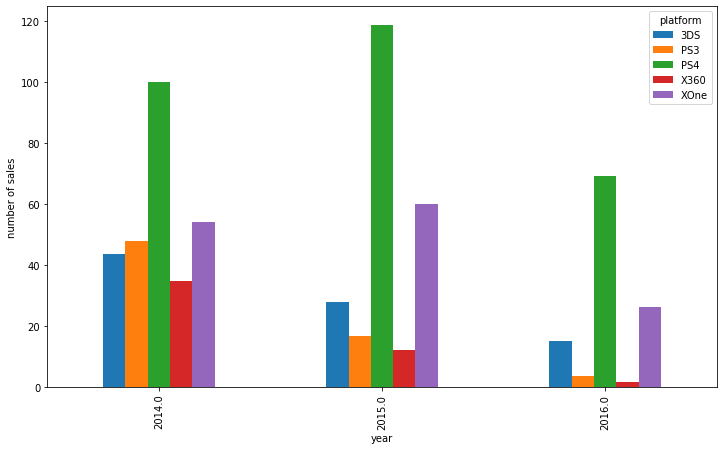

In [30]:
platform_subset.pivot_table(index="year_of_release_noempty",
                      columns="platform",
                      values="total_sales",
                      aggfunc=np.sum,
                    fill_value=0).plot(kind = 'bar',figsize=(12,7),legend=True)
pl.xlabel('year')
pl.ylabel('number of sales')

## 3.5 Build a box plot for the global sales of all games, broken down by platform 

Text(0.5, 1.0, 'Boxplot')

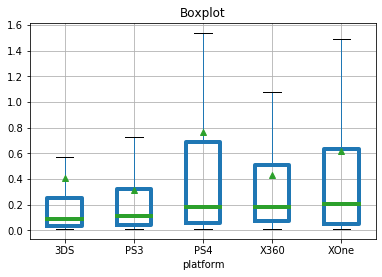

In [31]:
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

ax = platform_subset.boxplot(column=['total_sales'],
                by='platform',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
pl.suptitle("")
ax.set_xlabel("platform")
ax.set_title("Boxplot")

by looking at the boxplot we can say that the leading platforms in sales are PS4 and Xone basically Xbox and PlayStation. 

Text(0.5, 1.0, 'Boxplot')

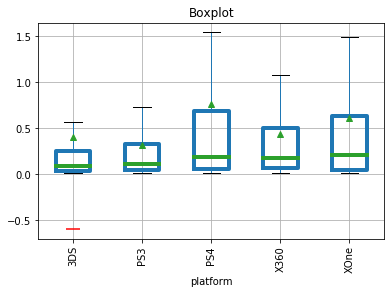

In [32]:
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

ax = platform_subset.boxplot(column=['total_sales'],
                by='platform',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
Q1 = platform_subset['total_sales'].quantile(0.25)
Q3 = platform_subset['total_sales'].quantile(0.75)
IQR = Q3 - Q1
pl.xticks(rotation=90)
pl.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
# get rid of the automatic title
pl.suptitle("")
ax.set_xlabel("platform")
ax.set_title("Boxplot")

PC games are not leading in this chart the reason may be because of quality and user experiance of playing game.

## 3.6 Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales.  

In [33]:
plat_ps4 = platform_subset.query('platform in ("PS4")')
plat_ps4["user_score_noempty"] = pd.to_numeric(plat_ps4['user_score_noempty'], errors='coerce')
plat_ps4.sort_values('total_sales',ascending = False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales,rating_noempty
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,2015.0,70.1811,7.041883,14.63,M
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,2014.0,97,8.300000,12.62,M
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,2015.0,82,4.300000,8.58,E
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,2015.0,70.1811,7.041883,7.98,M
92,Call of Duty: Advanced Warfare,PS4,Shooter,2.81,3.48,0.14,1.23,2014.0,83,5.700000,7.66,M
...,...,...,...,...,...,...,...,...,...,...,...,...
15943,Professional Farmer 2016,PS4,Action,0.00,0.01,0.00,0.00,2015.0,66.6291,7.054044,0.01,T
15864,Rocksmith 2014 Edition Remastered,PS4,Misc,0.01,0.00,0.00,0.00,2016.0,66.6195,7.800000,0.01,T
15839,Mark McMorris Infinite Air,PS4,Sports,0.01,0.00,0.00,0.00,2016.0,49,6.000000,0.01,T
15790,This War of Mine,PS4,Action,0.00,0.01,0.00,0.00,2016.0,66.6291,7.054044,0.01,T


We chose PS4 platform for this task as we have seen in the last task that this platform is highest selling platform for given time period.

In [34]:
ps4_pivot = (plat_ps4.pivot_table(index = ['name','user_score_noempty'], values = 'total_sales',aggfunc = 'sum')).reset_index()
ps4_pivot = ps4_pivot.sort_values('user_score_noempty',ascending = False)
ps4_pivot.head(5)

,name,user_score_noempty,total_sales
324,The Witcher 3: Wild Hunt,9.2,3.97
50,Dark Souls III,8.8,1.66
314,The King of Fighters XIV,8.7,0.15
111,Farming Simulator 17,8.7,0.42
254,Rocket League,8.7,0.36


In [35]:
ps4_pivot = ps4_pivot.sort_values('total_sales',ascending = False)
ps4_pivot.head(5)

,name,user_score_noempty,total_sales
43,Call of Duty: Black Ops 3,7.041883,14.63
130,Grand Theft Auto V,8.300000,12.62
104,FIFA 16,4.300000,8.58
287,Star Wars Battlefront (2015),7.041883,7.98
42,Call of Duty: Advanced Warfare,5.700000,7.66


As we seen here the top 5 games which are having highest sales in PS4 are: Call of Duty: Black Ops 3	, Grand Theft Auto V,	FIFA 16	, Star Wars Battlefront (2015), Call of Duty: Advanced Warfare	top 5 games which are having highest user scores are in PS4: The Witcher 3: Wild Hunt,Dark Souls III,The King of Fighters XIV,Farming Simulator,Rocket League	
so, User ratings does not affect sales because user ratings are divided by the choice of genre, visual quality and overall user experiance which differes from platform to platform.

Text(0.5, 1.0, 'Scatterplot for platform PS4')

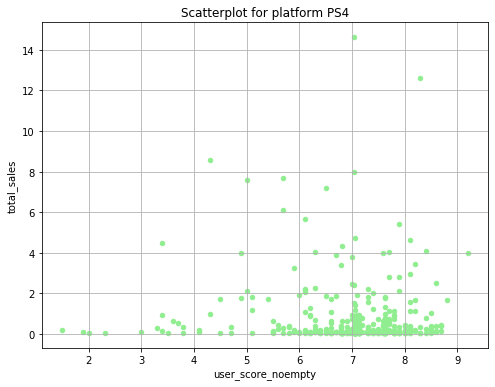

In [36]:
plat_ps4.plot(x='user_score_noempty', y = 'total_sales', kind = 'scatter', figsize=(8, 6), grid=True, c= 'lightgreen')
pl.title('Scatterplot for platform PS4')

In [37]:
print(plat_ps4['user_score_noempty'].corr(plat_ps4['total_sales']))

-0.05302175180537961


A correlation of -0.053 implies a connection, though it could be weaker. Increase user_score_noempty and total_sales will often increase, but not always. And vice versa: increase user_score_noempty, and total_sales will often change. Thus, we don't know anything about cause and effect; we only know that the two factors show correlation.
Thus, you can't prove cause and effect with the presence of correlation, but you won’t disprove it either.

In [38]:
popular_games_ps4 = plat_ps4["name"]
popular_games_ps4

31            Call of Duty: Black Ops 3
42                   Grand Theft Auto V
77                              FIFA 16
87         Star Wars Battlefront (2015)
92       Call of Duty: Advanced Warfare
                      ...              
16500                       Root Letter
16503                 Shin Hayarigami 2
16526                        Dungeons 2
16530           Carmageddon: Max Damage
16585     Farming 2017 - The Simulation
Name: name, Length: 376, dtype: object

## 3.7 Keeping your conclusions in mind, compare the sales of the same games on other platforms. 

In [39]:
popular_games_other_plat = platform_subset.query('name in @popular_games_ps4 and platform != "PS4"')
popular_games_other_plat.sort_values('total_sales',ascending = False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales,rating_noempty
99,Call of Duty: Black Ops 3,XOne,Shooter,4.59,2.11,0.01,0.68,2015.0,70.1811,7.041883,7.39,M
165,Grand Theft Auto V,XOne,Action,2.81,2.19,0.00,0.47,2014.0,97,7.900000,5.47,M
180,Minecraft,PS3,Misc,2.03,2.37,0.00,0.87,2014.0,66.6195,6.819362,5.27,E
179,Call of Duty: Advanced Warfare,XOne,Shooter,3.22,1.55,0.01,0.48,2014.0,81,5.400000,5.26,M
255,Call of Duty: Advanced Warfare,PS3,Shooter,1.56,1.93,0.19,0.68,2014.0,70.1811,4.800000,4.36,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16015,Mark McMorris Infinite Air,XOne,Sports,0.01,0.00,0.00,0.00,2016.0,71.9682,7.100000,0.01,T
16013,Dead Rising 2,XOne,Action,0.01,0.00,0.00,0.00,2016.0,66.6291,7.054044,0.01,M
15891,Rugby League Live 3,PS3,Action,0.00,0.01,0.00,0.00,2015.0,66.6291,7.054044,0.01,T
15486,Arslan: The Warriors of Legend,XOne,Action,0.01,0.00,0.00,0.00,2016.0,66.6291,5.800000,0.01,T


In [40]:
popular_games_pivot = (popular_games_other_plat.pivot_table(index = ['name','user_score_noempty','platform'], values = 'total_sales',aggfunc = 'sum')).reset_index()
popular_games_pivot = popular_games_pivot.sort_values('total_sales',ascending = False)
popular_games_pivot.head(5)

,name,user_score_noempty,platform,total_sales
49,Call of Duty: Black Ops 3,7.041883,XOne,7.39
133,Grand Theft Auto V,7.900000,XOne,5.47
212,Minecraft,6.819362,PS3,5.27
46,Call of Duty: Advanced Warfare,5.400000,XOne,5.26
44,Call of Duty: Advanced Warfare,4.800000,PS3,4.36


In [41]:
popular_games_pivot = popular_games_pivot.sort_values('user_score_noempty',ascending = False)
popular_games_pivot.head(5)

,name,user_score_noempty,platform,total_sales
374,The Witcher 3: Wild Hunt,9.2,XOne,1.30
43,Brothers: A Tale of Two Sons,8.9,XOne,0.04
368,The Peanuts Movie: Snoopy's Grand Adventure,8.8,3DS,0.03
60,Dead Rising,8.8,XOne,0.01
170,LEGO The Hobbit,8.7,X360,0.45


here almost same games are in top selling 5 games Call of Duty: Black Ops,Grand Theft Auto V ,Minecraft,Call of Duty: Advanced Warfare,Call of Duty: Advanced Warfare	 that could be because games are depend on the platforms. and here also, user score does not depend on top sells.

Text(0.5, 1.0, 'Scatterplot for other platforms')

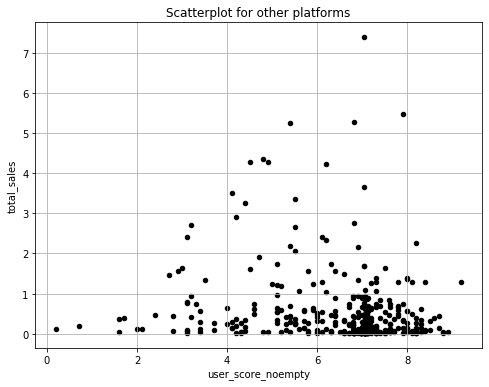

In [42]:
popular_games_other_plat["user_score_noempty"] = pd.to_numeric(popular_games_other_plat['user_score_noempty'], errors='coerce')
popular_games_other_plat.plot(x='user_score_noempty', y = 'total_sales', kind = 'scatter', figsize=(8, 6), grid=True, c= 'black')
pl.title('Scatterplot for other platforms')


In [43]:
print(popular_games_other_plat['user_score_noempty'].corr(popular_games_other_plat['total_sales']))

-0.16310774040893242


A correlation of -0.163 implies a connection, though it could be opposite. Increase user_score_noempty and total_sales will often increase, but not always. And vice versa: increase user_score_noempty, and total_sales will often change. Thus, we don't know anything about cause and effect; we only know that the two factors show correlation.
Thus, you can't prove cause and effect with the presence of correlation, but you won’t disprove it either.

Text(0.5, 1.0, 'Boxplot')

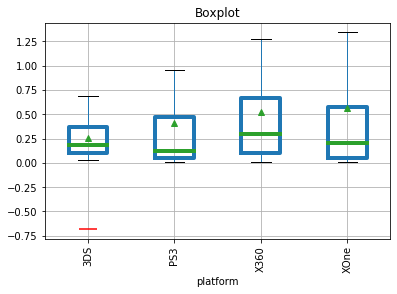

In [44]:
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

ax = popular_games_other_plat.boxplot(column=['total_sales'],
                by='platform',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
Q1 = popular_games_other_plat['total_sales'].quantile(0.25)
Q3 = popular_games_other_plat['total_sales'].quantile(0.75)
IQR = Q3 - Q1
pl.xticks(rotation=90)
pl.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
# get rid of the automatic title
pl.suptitle("")
ax.set_xlabel("platform")
ax.set_title("Boxplot")

box plot sates that top selling platform other than x360 is PS3

## 3.8 Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? 

In [45]:
genre_sales = (year_subset.pivot_table(index = ['genre'], values = 'total_sales',aggfunc = 'sum')).reset_index()
genre_sales_sorted = genre_sales.sort_values('total_sales',ascending = False)
genre_sales_sorted.head()

,genre,total_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55


Text(0, 0.5, 'number of sales')

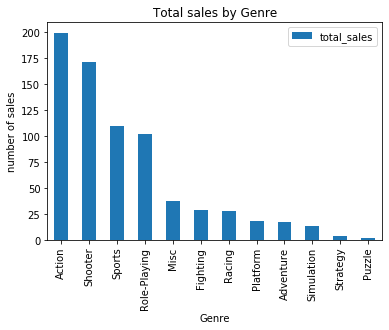

In [46]:
genre_sales_sorted.plot('genre',sharex=True, sharey=True,kind='bar')
pl.title('Total sales by Genre')
pl.xlabel('Genre')
pl.ylabel('number of sales')


Here we found out top 5 genre having top sell: "Action","Shooter","Sports","Role-Playing","Misc"

In [47]:
genre_subset = year_subset.query('genre in ("Action","Shooter","Sports","Role-Playing","Misc")')
genre_subset.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release_noempty,critic_score_noempty,user_score_noempty,total_sales,rating_noempty
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,2015.0,70.1811,7.04188,14.63,M
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,2014.0,97,8.3,12.62,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35,3.49,3.10,0.74,2014.0,72.6526,7.61952,11.68,T
77,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,2015.0,82,4.3,8.58,E
87,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,2015.0,70.1811,7.04188,7.98,M


created subset for top 5 to selling genres

# 4. Create a user profile for each region

## 4.1 The top five platforms. Describe variations in their market shares from region to region. 

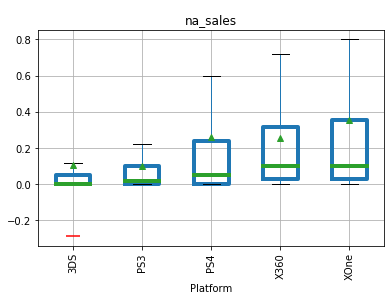

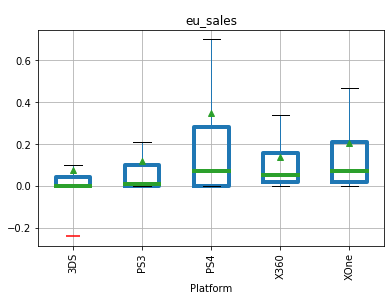

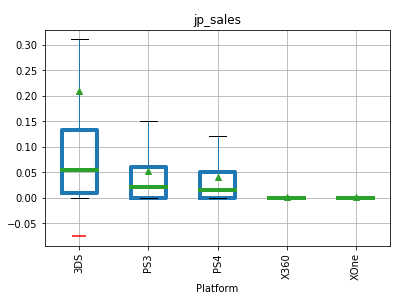

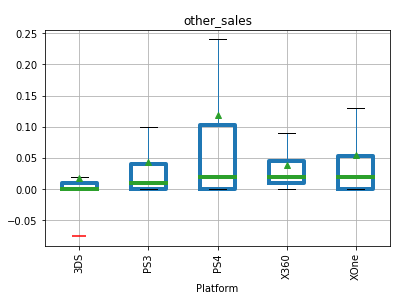

In [48]:
columns_to_clean = ['na_sales','eu_sales','jp_sales','other_sales']
for x in columns_to_clean:
    boxprops = dict(linestyle='-', linewidth=4, color='k')
    medianprops = dict(linestyle='-', linewidth=4, color='k')

    ax = platform_subset.boxplot(column=[x],
                by='platform',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
    Q1 = platform_subset[x].quantile(0.25)
    Q3 = platform_subset[x].quantile(0.75)
    IQR = Q3 - Q1
    pl.xticks(rotation=90)
    pl.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
# get rid of the automatic title
    pl.suptitle(" ")
    ax.set_xlabel("Platform")
    ax.set_title(f'{x}')
    

as we follow boxplot we can say that other than America PS4 has highest sells in  EU and Other regions while, Japan has 3DS platform leading in popularity and NA has Xone.

In [49]:
for x in columns_to_clean:
    print(platform_subset.groupby('platform').agg({f'{x}': ['mean']}).reset_index())

  platform  na_sales
                mean
0      3DS  0.106792
1      PS3  0.100685
2      PS4  0.262261
3     X360  0.254955
4     XOne  0.356447
  platform  eu_sales
                mean
0      3DS  0.076038
1      PS3  0.116621
2      PS4  0.345851
3     X360  0.139550
4     XOne  0.202851
  platform  jp_sales
                mean
0      3DS  0.208679
1      PS3  0.051233
2      PS4  0.039947
3     X360  0.000721
4     XOne  0.001404
  platform other_sales
                  mean
0      3DS    0.017358
1      PS3    0.042785
2      PS4    0.118298
3     X360    0.039189
4     XOne    0.054912


## 4.2  The top five genres. Explain the difference. 

In [50]:
for x in columns_to_clean:
    print(genre_subset.groupby('genre').agg({f'{x}': ['mean']}).reset_index())

          genre  na_sales
                     mean
0        Action  0.117173
1          Misc  0.133186
2  Role-Playing  0.151448
3       Shooter  0.617344
4        Sports  0.286522
          genre  eu_sales
                     mean
0        Action  0.120646
1          Misc  0.113805
2  Role-Playing  0.127466
3       Shooter  0.511875
4        Sports  0.284037
          genre  jp_sales
                     mean
0        Action  0.047787
1          Misc  0.049646
2  Role-Playing  0.140995
3       Shooter  0.038047
4        Sports  0.020248
          genre other_sales
                       mean
0        Action    0.036462
1          Misc    0.035664
2  Role-Playing    0.039095
3       Shooter    0.168203
4        Sports    0.089193


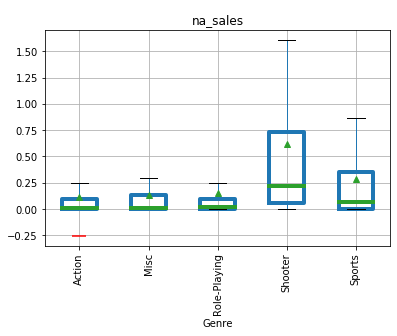

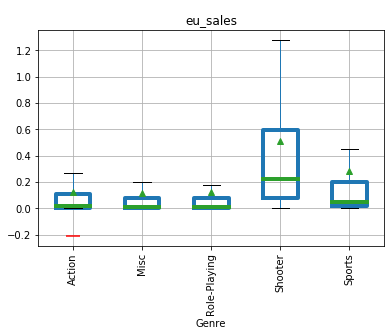

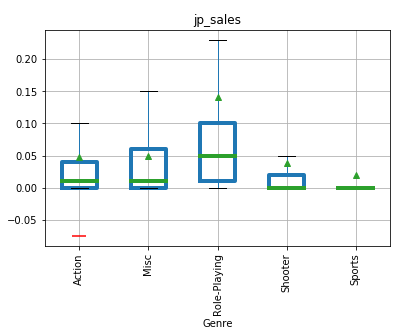

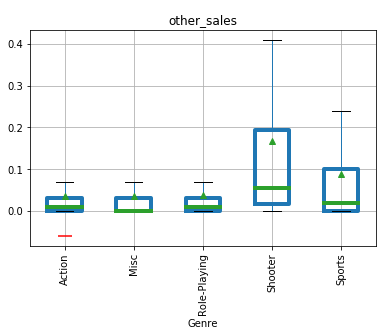

In [51]:
for x in columns_to_clean:
    boxprops = dict(linestyle='-', linewidth=4, color='k')
    medianprops = dict(linestyle='-', linewidth=4, color='k')

    ax = genre_subset.boxplot(column=[x],
                by='genre',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
    Q1 = genre_subset[x].quantile(0.25)
    Q3 = genre_subset[x].quantile(0.75)
    IQR = Q3 - Q1
    pl.xticks(rotation=90)
    pl.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
# get rid of the automatic title
    pl.suptitle(" ")
    ax.set_xlabel("Genre")
    ax.set_title(f'{x}')
    

selling of games is different in different areas according to genre.
Except Japan(Role-Playing) in other remaining regions Shooter is popular Genre

## 4.3 Do ESRB ratings affect sales in individual regions?  

In [52]:
for x in columns_to_clean:
    print(year_subset.groupby(['rating_noempty'])[f'{x}'].mean().reset_index())

  rating_noempty  na_sales
0              E  0.125636
1           E10+  0.179622
2              M  0.408617
3              T  0.100977
  rating_noempty  eu_sales
0              E  0.150384
1           E10+  0.141405
2              M  0.388404
3              T  0.083287
  rating_noempty  jp_sales
0              E  0.039333
1           E10+  0.024108
2              M  0.030887
3              T  0.083150
  rating_noempty  other_sales
0              E     0.039859
1           E10+     0.042324
2              M     0.121454
3              T     0.027249


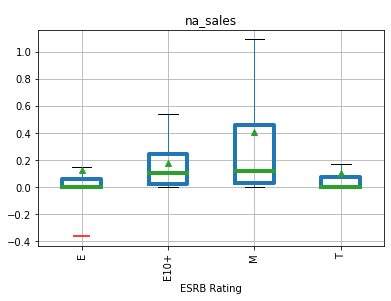

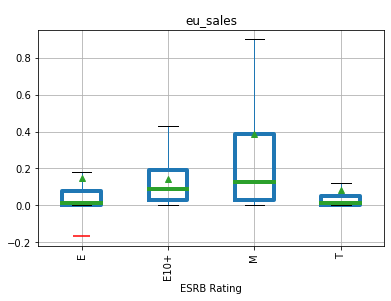

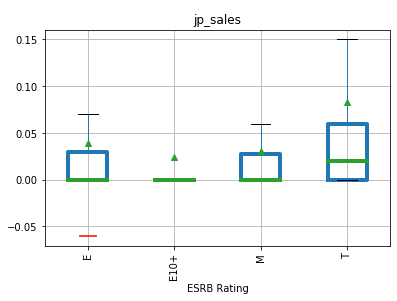

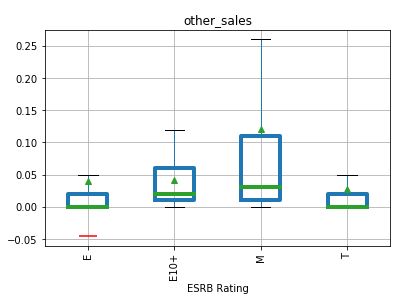

In [53]:
for x in columns_to_clean:
    boxprops = dict(linestyle='-', linewidth=4, color='k')
    medianprops = dict(linestyle='-', linewidth=4, color='k')

    ax = year_subset.boxplot(column=[x],
                by='rating_noempty',
                showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops)
    Q1 = new_df[x].quantile(0.25)
    Q3 = new_df[x].quantile(0.75)
    IQR = Q3 - Q1
    pl.xticks(rotation=90)
    pl.hlines(y= [Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
# get rid of the automatic title
    pl.suptitle(" ")
    ax.set_xlabel("ESRB Rating")
    ax.set_title(f'{x}')
    

ESRB ratings affect sales in different ways in different areas.
1. na_sales = M rating
2. eu_sales = M rating
3. jp_sales = T rating
4. other_sales = M rating

In [54]:
popular_games_pivot = (year_subset.pivot_table(index = ['name','rating_noempty','year_of_release_noempty'], values = 'total_sales',aggfunc = 'sum')).reset_index()
popular_games_pivot = popular_games_pivot.sort_values('total_sales',ascending = False)
popular_games_pivot.head(5)

,name,rating_noempty,year_of_release_noempty,total_sales
114,Call of Duty: Black Ops 3,M,2015.0,25.67
113,Call of Duty: Advanced Warfare,M,2014.0,21.97
342,Grand Theft Auto V,M,2014.0,18.09
268,FIFA 15,E,2014.0,17.37
269,FIFA 16,E,2015.0,16.30


here we can see  that the highest grossing games on different platforms are different and our top 5 grossing games are have M rating.

In [55]:
new_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# 5. Test the following hypotheses

In [56]:
x_one_data = year_subset.query('platform in ("XOne")')
x_one_data.columns

Index(['name', 'platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'year_of_release_noempty', 'critic_score_noempty',
       'user_score_noempty', 'total_sales', 'rating_noempty'],
      dtype='object')

In [57]:
pc_data = year_subset.query('platform in ("PC")')

we have created two separate dataset to run hypotheses

## 5.1 Average user ratings of the Xbox One and PC platforms are the same 

In [58]:
from scipy.stats import mannwhitneyu

In [59]:
print(x_one_data['user_score_noempty'].mean())
variance = np.var(x_one_data['user_score_noempty'])
print(variance)
standard_deviation = np.sqrt(variance)
print(standard_deviation)

6.72932395185694
1.4171638280917858
1.1904469026763798


In [60]:
print(pc_data['user_score_noempty'].mean())
variance = np.var(pc_data['user_score_noempty'])
print(variance)
standard_deviation = np.sqrt(variance)
print(standard_deviation)

6.451523964348695
2.4281321345453364
1.5582464935129283


In [61]:
stat, p = mannwhitneyu(x_one_data['user_score_noempty'], pc_data['user_score_noempty'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=16249.500, p=0.178
Same distribution (fail to reject H0)


The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.
The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

Running the example calculates the test on the datasets and prints the statistic and p-value.
The p-value strongly suggests that the sample distributions are different, means Average user ratings of the Xbox One and PC platforms are not the same.


## 5.2 Average user ratings for the Action and Sports genres are different 

In [62]:
new_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [63]:
action_data = year_subset.query('genre in ("Action")')

In [64]:
print(action_data['user_score_noempty'].mean())
variance = np.var(action_data['user_score_noempty'])
print(variance)
standard_deviation = np.sqrt(variance)
print(standard_deviation)

6.913250527468074
0.9293250506271619
0.9640150676349213


In [65]:
sports_data = year_subset.query('genre in ("Sports")')

In [66]:
print(sports_data['user_score_noempty'].mean())
variance = np.var(sports_data['user_score_noempty'])
print(variance)
standard_deviation = np.sqrt(variance)
print(standard_deviation)

5.591805521924962
3.199666532860829
1.7887611726725368


In [67]:
stat, p = mannwhitneyu(action_data['user_score_noempty'], sports_data['user_score_noempty'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=20388.500, p=0.000
Different distribution (reject H0)


Running the example calculates the test on the datasets and prints the statistic and p-value.
The p-value strongly suggests that the sample distributions are different, means AAverage user ratings for the Action and Sports genres are different.
Level of significance alpha: Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.
This is generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.

# Final Conclusion

The aim of the project was 'You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns'
My findings are:
1. Top 5 popular platforms: "PS4","XOne","3DS","PS3","X360"(Leadin two are:PS4 and Xone)
2. Top 5 popular genres: "Action","Shooter","Sports","Role-Playing","Misc"(Leading are: Action, Shooter and Role-Playing in Japan)
3. Top 5 popular games common for all above: Call of Duty: Black Ops 3	, Grand Theft Auto V,	FIFA 16	, Star Wars Battlefront (2015), Call of Duty: Advanced Warfare,Minecraft
4. Top ESRB rating for this games is: M and T for Japan
5. Considered period for calculation : 2014 and above

by analysing all the given data we have to focus on above parameters for our advertising campaign.